In [1]:
import pandas as pd

In [2]:
expense_dataset = pd.read_csv('./data/Personal_Finance_Dataset.csv')

expense_dataset = expense_dataset.sort_values("Date")

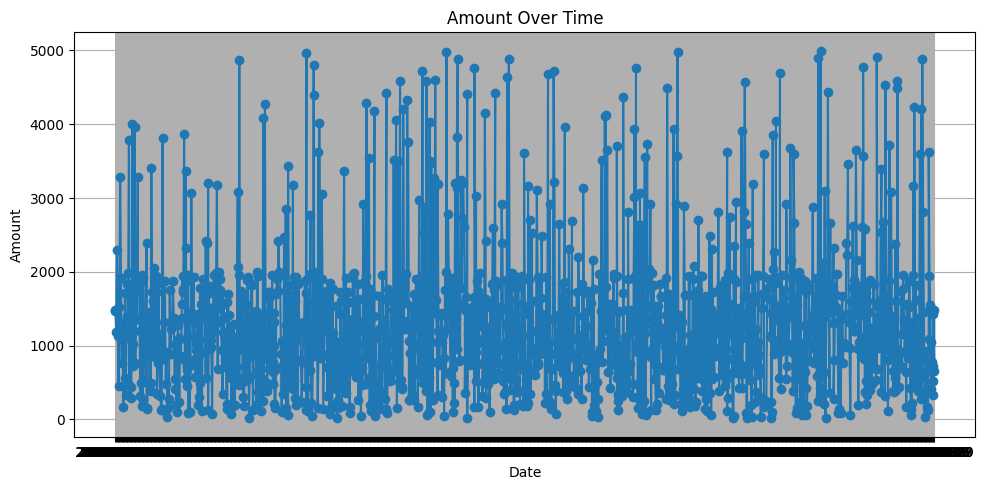

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(expense_dataset ['Date'], expense_dataset['Amount'], marker='o')
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("Amount Over Time")
plt.grid(True)
plt.tight_layout()

(array([53., 78., 53., 65., 55., 62., 74., 68., 77., 76., 68., 62., 58.,
        76., 73., 64., 59., 60., 65., 73.,  5.,  5.,  3., 11.,  6.,  5.,
        13.,  4.,  8.,  8.,  8.,  9.,  8.,  3.,  6.,  9.,  8.,  4.,  4.,
         5.,  6.,  4.,  5.,  2.,  7.,  6.,  3.,  5.,  5.,  6.]),
 array([  14.37  ,  114.0026,  213.6352,  313.2678,  412.9004,  512.533 ,
         612.1656,  711.7982,  811.4308,  911.0634, 1010.696 , 1110.3286,
        1209.9612, 1309.5938, 1409.2264, 1508.859 , 1608.4916, 1708.1242,
        1807.7568, 1907.3894, 2007.022 , 2106.6546, 2206.2872, 2305.9198,
        2405.5524, 2505.185 , 2604.8176, 2704.4502, 2804.0828, 2903.7154,
        3003.348 , 3102.9806, 3202.6132, 3302.2458, 3401.8784, 3501.511 ,
        3601.1436, 3700.7762, 3800.4088, 3900.0414, 3999.674 , 4099.3066,
        4198.9392, 4298.5718, 4398.2044, 4497.837 , 4597.4696, 4697.1022,
        4796.7348, 4896.3674, 4996.    ]),
 <BarContainer object of 50 artists>)

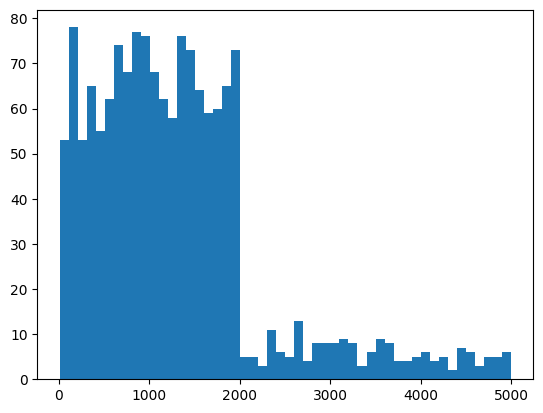

In [4]:
plt.hist(expense_dataset['Amount'],bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3dedea230>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3dedea710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3dede9f30>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3dedead10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3dedeb010>],
 'means': []}

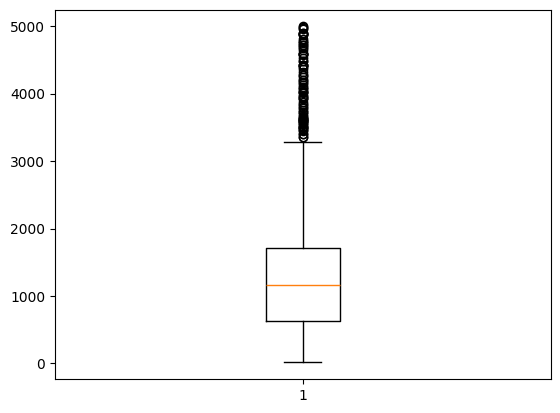

In [5]:
plt.boxplot(expense_dataset['Amount'])

# Cullen-Freychart

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.utils import resample

np.random.seed(42)
# Simulating a dataset that looks like expense data (e.g., Lognormal)
data_size = 5000 
expense_data = np.random.lognormal(mean=5.5, sigma=1.2, size=data_size)

# Add a few very small expenses
expense_data = np.concatenate([expense_data, np.random.uniform(10, 50, 500)])
sample_expense_dataset = pd.DataFrame({'Amount': expense_data})
# --------------------------------------------------------------------------

# Set the data series
amount_data = expense_dataset['Amount']

In [7]:
def run_bootstrapped_cullen_frey(data_series, n_bootstraps=1000):
    """
    Performs bootstrap sampling and calculates the squared skewness and 
    kurtosis for each sample.
    """
    skew_sq_values = []
    kurtosis_values = []
    
    # Get the size of the original dataset
    n_samples = len(data_series)
    
    for i in range(n_bootstraps):
        # 1. Create a bootstrap sample (resampling with replacement)
        sample = resample(data_series.values, replace=True, n_samples=n_samples)
        
        # 2. Calculate the moments for the bootstrap sample
        sample_skewness = skew(sample)
        sample_kurtosis = kurtosis(sample, fisher=False) # Pearson's Kurtosis (Normal=3)
        
        # 3. Store the results
        skew_sq_values.append(sample_skewness**2)
        kurtosis_values.append(sample_kurtosis)
        
    # Return a DataFrame of the results
    return pd.DataFrame({
        'Skewness_Squared': skew_sq_values,
        'Kurtosis': kurtosis_values
    })

In [8]:
cullen_frey_boot_df = run_bootstrapped_cullen_frey(expense_dataset['Amount'])

In [9]:
## Calculate Skewness and Kurtosis

# Calculate Sample Skewness (g1)
def skew_kertosis(amount_data,cullen_frey_boot_df):
    sample_skewness = skew(amount_data)

    # Calculate Sample Kurtosis (g2 + 3)
    # We use fisher=False to get the Pearson/moment kurtosis (where Normal = 3)
    sample_kurtosis = kurtosis(amount_data, fisher=False)

    # Calculate the squared skewness for the plot's X-axis
    skewness_squared = sample_skewness**2

    max_x = cullen_frey_boot_df['Skewness_Squared'].max()
    max_y = cullen_frey_boot_df['Kurtosis'].max()
    print(f"Sample Skewness^2: {skewness_squared:.4f}")
    print(f"Sample Kurtosis: {sample_kurtosis:.4f}")


    ## Create the Cullen-Frey Plot

    plt.figure(figsize=(9, 6))

    # --- 1. Plot the Sample Data Point (Your 'Amount' data) ---
    plt.scatter(cullen_frey_boot_df['Skewness_Squared'], 
                cullen_frey_boot_df['Kurtosis'], 
                color='blue', s=10, alpha=0.2, label=f'Bootstrap Samples (n={len(cullen_frey_boot_df)})')
    plt.scatter(skewness_squared, sample_kurtosis, 
                color='blue', s=150, marker='o', 
                label='Your Sample Data (Amount)')

    # --- 2. Plot Theoretical Distribution Points ---
    # These are the expected (Skew^2, Kurtosis) for common distributions
    # Normal Distribution: (0, 3)
    plt.scatter(0, 3, color='red', s=150, marker='X', label='Normal (0, 3)')

    # Uniform Distribution: (0, 1.8)
    plt.scatter(0, 1.8, color='green', s=150, marker='D', label='Uniform (0, 1.8)')

    # Exponential Distribution: (4, 9)
    plt.scatter(4, 9, color='orange', s=150, marker='s', label='Exponential (4, 9)')

    # --- 3. Add Theoretical Distribution Curves (Optional but Helpful) ---
    # Gamma and Beta curves are often plotted to help identify candidates.
    # They show the space where these distributions can exist.

    # Gamma Curve (Kurtosis = 3/2 * Skewness^2 + 3)
    x_gamma = np.linspace(0, 10, 100)
    y_gamma = 1.5 * x_gamma + 3
    plt.plot(x_gamma, y_gamma, color='gray', linestyle='--', label='Gamma Family')

    # Lognormal Family: Falls just above the Gamma line (not easy to plot exactly)
    # Weibull Family: Tends to fall between the Gamma and Uniform regions
    plt.scatter(0, 4.2, color='purple', s=150, marker='^', label='Logistic (0, 4.2)')

    ### Lognormal Family
    # The Lognormal curve is complex, but it starts at the Normal point (0, 3) and generally 
    # lies *just above* the Gamma line, especially for high skewness.
    # Plotting the Lognormal curve's exact line requires solving for the shape parameter (m), 
    # but it's often shown as a distinct, slightly curved line above Gamma.
    # We'll plot an approximation line to illustrate the separation.
    y_lognorm_approx = 1.7 * x_gamma + 3.1 
    plt.plot(x_gamma, y_lognorm_approx, color='darkgreen', linestyle=':', linewidth=2, label='Lognormal Family')


    ### Beta Family
    # The Beta distribution occupies the entire region *below* the Gamma line and *above* # the region defined by the Uniform point (0, 1.8) and the curve connecting it to the Normal point.
    # Beta is the most flexible and covers the entire region below the Gamma line.
    # We often highlight the region rather than a specific line.
    # (Note: Shading the region is best, but using a single line often marks the boundary.)

    # --- 4. Customize the Plot ---
    plt.title('Cullen-Frey Graph for Expense Amount Distribution', fontsize=14)
    plt.xlabel('Squared Skewness $(\\text{Skew}^2)$', fontsize=12)
    plt.ylabel('Kurtosis', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.ylim(0, max(sample_kurtosis + 2, 10)) # Adjust Y-limit dynamically
    plt.xlim(0, max(skewness_squared + 1, 5)) # Adjust X-limit dynamically
    plt.show()

Sample Skewness^2: 2.1275
Sample Kurtosis: 5.4610


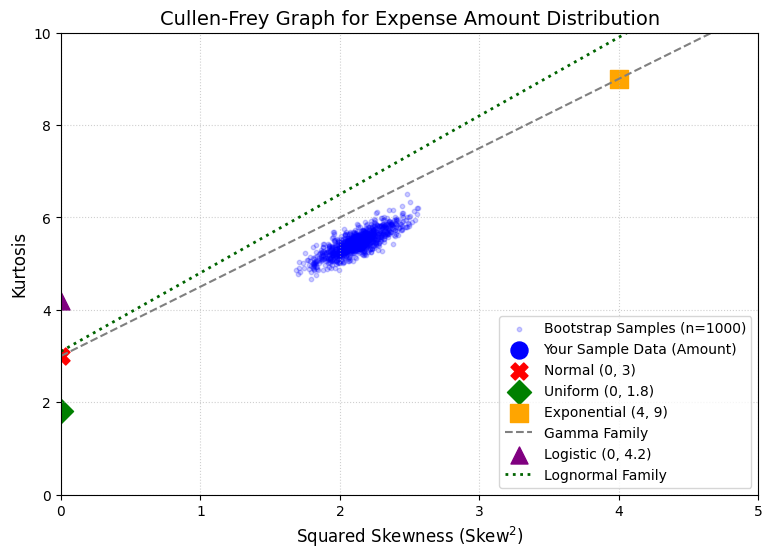

In [10]:
skew_kertosis(amount_data,cullen_frey_boot_df)

# Candiates: Beta,gamma

Gamma Fit Parameters: a=1.64, loc=0.00, scale=795.21
Beta Fit Parameters: a=1.53, b=17.51, loc=0.00, scale=16240.45


e:\FAI_Project\Finance-Management-using-AI\myenv\lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


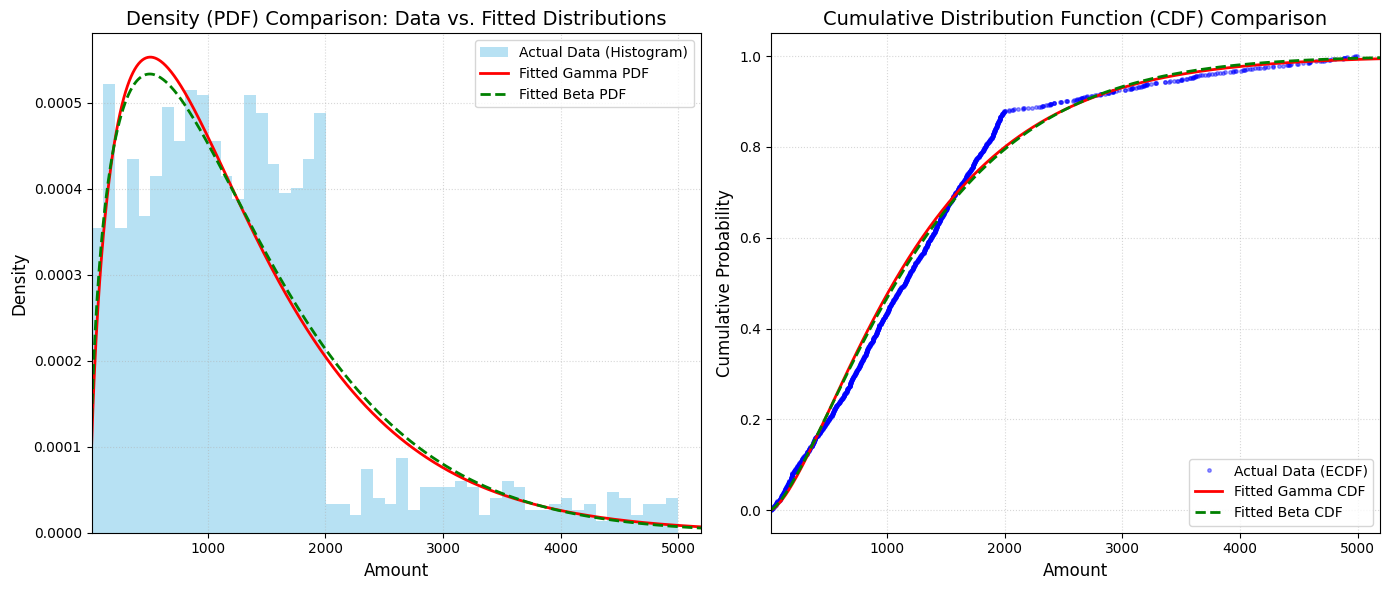

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma, beta


# --- 2. Fit Distributions using MLE ---

# A. Fit Gamma Distribution (3 parameters: a, loc, scale)
# Fix location (minimum value) at 0 as data is non-negative
params_gamma = gamma.fit(amount_data, floc=0)
a_gamma, loc_gamma, scale_gamma = params_gamma
print(f"Gamma Fit Parameters: a={a_gamma:.2f}, loc={loc_gamma:.2f}, scale={scale_gamma:.2f}")

# B. Fit Beta Distribution (4 parameters: a, b, loc, scale)
# Let fit estimate the bounds (loc and scale)
params_beta = beta.fit(amount_data, floc=0)
a_beta, b_beta, loc_beta, scale_beta = params_beta
print(f"Beta Fit Parameters: a={a_beta:.2f}, b={b_beta:.2f}, loc={loc_beta:.2f}, scale={scale_beta:.2f}")

# --- 3. Prepare Data for Plotting ---
data_min = amount_data.min()
data_max = amount_data.max()
# Create a range of x-values for plotting the theoretical curves
x = np.linspace(data_min, data_max * 1.05, 1000)

# Calculate theoretical PDF and CDF values
pdf_gamma = gamma.pdf(x, a_gamma, loc=loc_gamma, scale=scale_gamma)
cdf_gamma = gamma.cdf(x, a_gamma, loc=loc_gamma, scale=scale_gamma)

pdf_beta = beta.pdf(x, a_beta, b_beta, loc=loc_beta, scale=scale_beta)
cdf_beta = beta.cdf(x, a_beta, b_beta, loc=loc_beta, scale=scale_beta)

# --- 4. Plotting (PDF and CDF) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Left Plot: Density / PDF ---
axes[0].hist(amount_data, bins=50, density=True, alpha=0.6, color='skyblue', label='Actual Data (Histogram)')
axes[0].plot(x, pdf_gamma, 'r-', lw=2, label='Fitted Gamma PDF')
axes[0].plot(x, pdf_beta, 'g--', lw=2, label='Fitted Beta PDF')

axes[0].set_title('Density (PDF) Comparison: Data vs. Fitted Distributions', fontsize=14)
axes[0].set_xlabel('Amount', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].legend(loc='upper right')
# Zoom in to the main data range (up to 99th percentile) for clarity
axes[0].set_xlim(amount_data.min() * 0.9, amount_data.quantile(0.99) * 1.1)
axes[0].grid(True, linestyle=':', alpha=0.5)

# --- Right Plot: CDF ---
# Calculate Empirical CDF (ECDF) for the actual data
ecdf_y = np.arange(1, len(amount_data) + 1) / len(amount_data)
ecdf_x = np.sort(amount_data)

axes[1].plot(ecdf_x, ecdf_y, 'b.', markersize=5, alpha=0.4, label='Actual Data (ECDF)')
axes[1].plot(x, cdf_gamma, 'r-', lw=2, label='Fitted Gamma CDF')
axes[1].plot(x, cdf_beta, 'g--', lw=2, label='Fitted Beta CDF')

axes[1].set_title('Cumulative Distribution Function (CDF) Comparison', fontsize=14)
axes[1].set_xlabel('Amount', fontsize=12)
axes[1].set_ylabel('Cumulative Probability', fontsize=12)
axes[1].legend(loc='lower right')
# Zoom in to the main data range
axes[1].set_xlim(amount_data.min() * 0.9, amount_data.quantile(0.99) * 1.1)
axes[1].grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

# Dataset 2

In [12]:
expense_dataset_2 = pd.read_csv('./data/expenses_income_summary.csv')

expense_dataset_2 = expense_dataset_2.sort_values("Date")

In [13]:
import numpy as np

([<matplotlib.axis.XTick at 0x1f3de54d630>,
 [Text(0, 0, '250.00'),
  Text(1000, 0, ''),
  Text(2000, 0, ''),
  Text(3000, 0, ''),
  Text(4000, 0, '')])

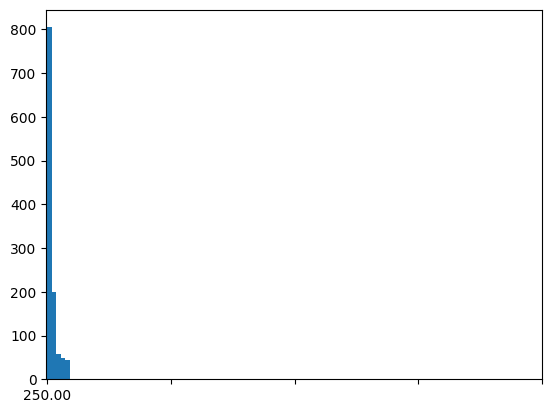

In [14]:
plt.hist(expense_dataset_2['amount'],bins=5)
plt.xticks(np.arange(0, 5000, 1000))

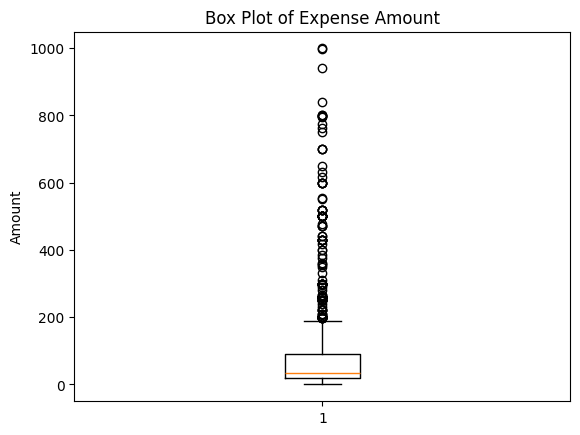

In [15]:
expense_dataset_2['amount'] = pd.to_numeric(
    expense_dataset_2['amount'], 
    errors='coerce'
)

# 2. (Optional but recommended) Remove NaN values
# Boxplot can usually handle NaNs, but it's good practice to clean the data
expense_data_clean = expense_dataset_2.dropna(subset=['amount'])

# 3. Create the box plot with the cleaned, numeric data
plt.boxplot(expense_data_clean['amount'])
plt.title("Box Plot of Expense Amount")
plt.ylabel("Amount")
plt.show()

Sample Skewness^2: 9.8063
Sample Kurtosis: 14.0071


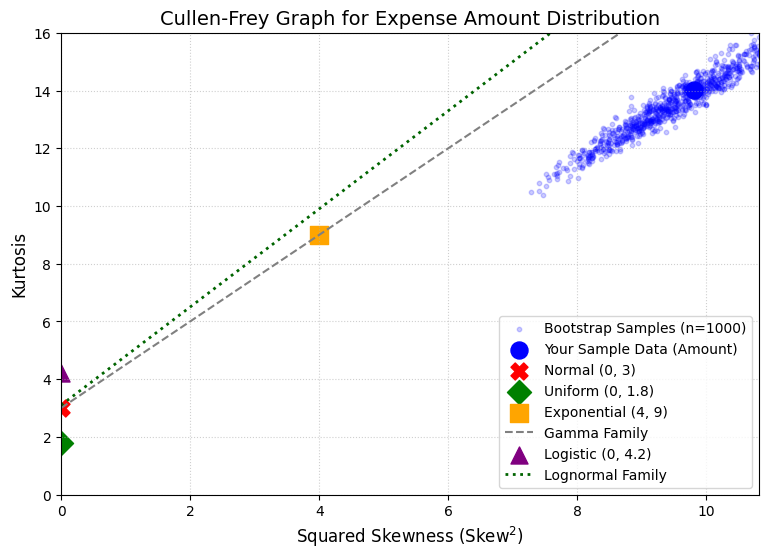

In [16]:
expense_data_clean = expense_dataset_2.dropna(subset=['amount'])
cullen_frey_boot_df = run_bootstrapped_cullen_frey(expense_data_clean['amount'])
amount_data = expense_data_clean['amount']
skew_kertosis(amount_data,cullen_frey_boot_df)

In [17]:
ad = amount_data[amount_data > 0]
amount_data = ad

# Candidates are Beta, exonential and gamma

Gamma Fit Parameters: a=0.75, loc=0.00, scale=120.69
Beta Fit Parameters: a=0.77, b=86458.28, loc=0.00, scale=10187766.47


e:\FAI_Project\Finance-Management-using-AI\myenv\lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
e:\FAI_Project\Finance-Management-using-AI\myenv\lib\site-packages\scipy\stats\_continuous_distns.py:800: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


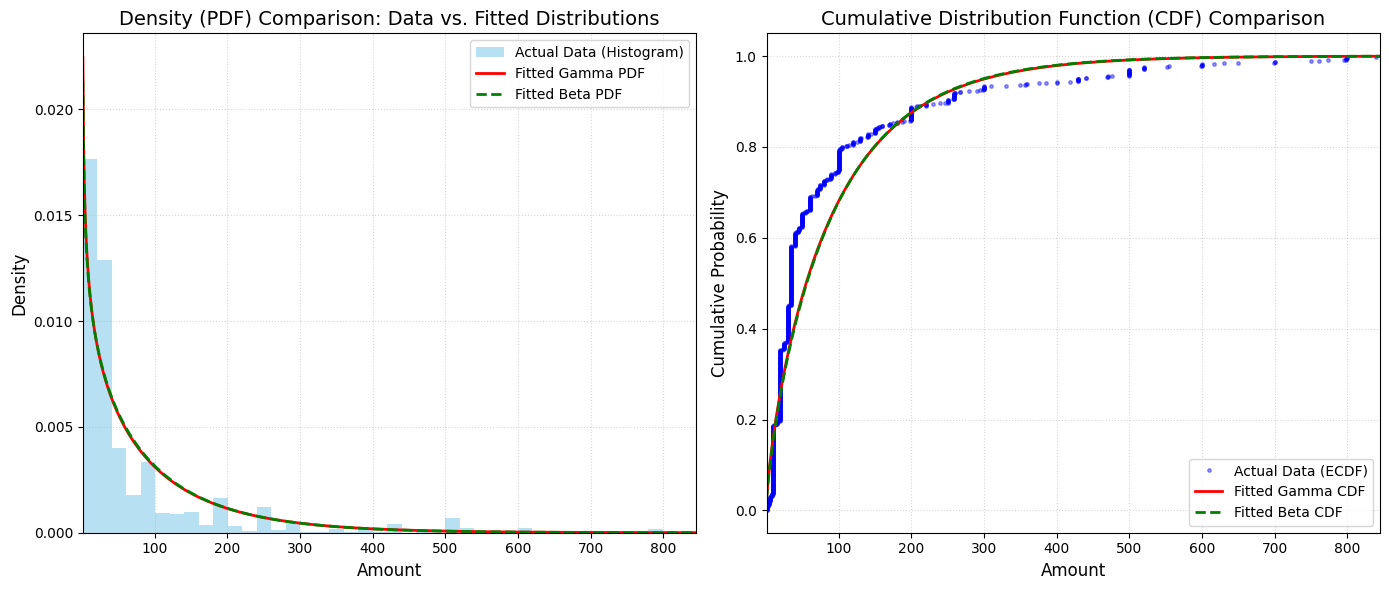

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma, beta


# --- 2. Fit Distributions using MLE ---

# A. Fit Gamma Distribution (3 parameters: a, loc, scale)
# Fix location (minimum value) at 0 as data is non-negative
params_gamma = gamma.fit(amount_data, floc=0)
a_gamma, loc_gamma, scale_gamma = params_gamma
print(f"Gamma Fit Parameters: a={a_gamma:.2f}, loc={loc_gamma:.2f}, scale={scale_gamma:.2f}")

# B. Fit Beta Distribution (4 parameters: a, b, loc, scale)
# Let fit estimate the bounds (loc and scale)
params_beta = beta.fit(amount_data, floc=0)
a_beta, b_beta, loc_beta, scale_beta = params_beta
print(f"Beta Fit Parameters: a={a_beta:.2f}, b={b_beta:.2f}, loc={loc_beta:.2f}, scale={scale_beta:.2f}")

# --- 3. Prepare Data for Plotting ---
data_min = amount_data.min()
data_max = amount_data.max()
# Create a range of x-values for plotting the theoretical curves
x = np.linspace(data_min, data_max * 1.05, 1000)

# Calculate theoretical PDF and CDF values
pdf_gamma = gamma.pdf(x, a_gamma, loc=loc_gamma, scale=scale_gamma)
cdf_gamma = gamma.cdf(x, a_gamma, loc=loc_gamma, scale=scale_gamma)

pdf_beta = beta.pdf(x, a_beta, b_beta, loc=loc_beta, scale=scale_beta)
cdf_beta = beta.cdf(x, a_beta, b_beta, loc=loc_beta, scale=scale_beta)

# --- 4. Plotting (PDF and CDF) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Left Plot: Density / PDF ---
axes[0].hist(amount_data, bins=50, density=True, alpha=0.6, color='skyblue', label='Actual Data (Histogram)')
axes[0].plot(x, pdf_gamma, 'r-', lw=2, label='Fitted Gamma PDF')
axes[0].plot(x, pdf_beta, 'g--', lw=2, label='Fitted Beta PDF')

axes[0].set_title('Density (PDF) Comparison: Data vs. Fitted Distributions', fontsize=14)
axes[0].set_xlabel('Amount', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].legend(loc='upper right')
# Zoom in to the main data range (up to 99th percentile) for clarity
axes[0].set_xlim(amount_data.min() * 0.9, amount_data.quantile(0.99) * 1.1)
axes[0].grid(True, linestyle=':', alpha=0.5)

# --- Right Plot: CDF ---
# Calculate Empirical CDF (ECDF) for the actual data
ecdf_y = np.arange(1, len(amount_data) + 1) / len(amount_data)
ecdf_x = np.sort(amount_data)

axes[1].plot(ecdf_x, ecdf_y, 'b.', markersize=5, alpha=0.4, label='Actual Data (ECDF)')
axes[1].plot(x, cdf_gamma, 'r-', lw=2, label='Fitted Gamma CDF')
axes[1].plot(x, cdf_beta, 'g--', lw=2, label='Fitted Beta CDF')

axes[1].set_title('Cumulative Distribution Function (CDF) Comparison', fontsize=14)
axes[1].set_xlabel('Amount', fontsize=12)
axes[1].set_ylabel('Cumulative Probability', fontsize=12)
axes[1].legend(loc='lower right')
# Zoom in to the main data range
axes[1].set_xlim(amount_data.min() * 0.9, amount_data.quantile(0.99) * 1.1)
axes[1].grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

# Standardizing and normalizing the amounts as both are in beta distributions

In [19]:
import numpy as np
from scipy.stats import beta
import pandas as pd

expense_data_clean = expense_data_clean[expense_data_clean['amount'] != 0].reset_index(drop=True)

def rescale_to_unit_interval(data):
    # Avoid zero-width range
    min_val, max_val = np.min(data), np.max(data)
    scaled = (data - min_val) / (max_val - min_val)
    # Shift values within (0,1) to avoid exactly 0 or 1 (epsilon=1e-6)
    epsilon = 1e-6
    scaled = np.clip(scaled, epsilon, 1 - epsilon)
    return scaled

def calculate_beta_params_mle(data):
    # The 'fit' method returns (alpha (a), beta (b), location (loc), scale (scale))
    # We force loc=0 and scale=1 for the standard beta distribution
    alpha, beta_val, loc, scale = beta.fit(data, floc=0, fscale=1)
    return alpha, beta_val


data1 = rescale_to_unit_interval(expense_dataset['Amount'].to_numpy())
data2 = rescale_to_unit_interval(expense_data_clean['amount'].to_numpy())

# Calculate parameters for the first dataset
alpha1, beta1 = calculate_beta_params_mle(data1)
print(f"Dataset 1: Alpha = {alpha1:.3f}, Beta = {beta1:.3f}")
alpha2, beta2 = calculate_beta_params_mle(data2)
print(f"Dataset 2: Alpha = {alpha2:.3f}, Beta = {beta2:.3f}")


# # Using the same example data from Method 1
# alpha1_mom, beta1_mom = calculate_beta_params_mom(expense_dataset['Amount'])
# print(f"Dataset 1 (MOM): Alpha = {alpha1_mom:.3f}, Beta = {beta1_mom:.3f}")

# alpha2_mom, beta2_mom = calculate_beta_params_mom(expense_dataset_2['amount'])
# print(f"Dataset 2 (MOM): Alpha = {alpha2_mom:.3f}, Beta = {beta2_mom:.3f}")


Dataset 1: Alpha = 1.004, Beta = 2.612
Dataset 2: Alpha = 0.542, Beta = 4.303


# First Approach to check if it gives Results

In [32]:
expense_data_clean['amount'].min()

np.float64(0.9)

In [26]:
min2 = expense_data_clean['amount'].min()
max2 = expense_data_clean['amount'].max()

In [27]:
max1 = expense_dataset['Amount'].max()
min1 = expense_dataset['Amount'].min()

In [28]:
print(max2,min2)
print(max1,min1)

999.0 0.9
4996.0 14.37


In [29]:
# Normalize
expense_dataset['Amount_norm'] = (expense_dataset['Amount'] - min1) / (max1 - min1)
expense_data_clean['Amount_norm'] = (expense_data_clean['amount'] - min2) / (max2 - min2)

# Combine normalized data
# Option 1: Stack for a single column of normalized values
combined = pd.concat([expense_dataset[['Amount_norm']], expense_data_clean[['Amount_norm']]], ignore_index=True)

# Option 2: Concatenate full normalized DataFrames (preserving origins)
combined_full = pd.concat([expense_dataset, expense_dataset], ignore_index=True)

print(combined.head())
print(combined_full.head())

   Amount_norm
0     0.295349
1     0.293320
2     0.235005
3     0.457005
4     0.223322
         Date                   Transaction Description      Category  \
0  2020-01-02                               Score each.  Food & Drink   
1  2020-01-02                       Quality throughout.     Utilities   
2  2020-01-04        Instead ahead despite measure ago.          Rent   
3  2020-01-05  Information last everything thank serve.    Investment   
4  2020-01-13              Future choice whatever from.  Food & Drink   

    Amount     Type  Amount_norm  
0  1485.69  Expense     0.295349  
1  1475.58  Expense     0.293320  
2  1185.08  Expense     0.235005  
3  2291.00   Income     0.457005  
4  1126.88  Expense     0.223322  


In [30]:
combined_full.head()

,Date,Transaction Description,Category,Amount,Type,Amount_norm
0,2020-01-02,Score each.,Food & Drink,1485.69,Expense,0.295349
1,2020-01-02,Quality throughout.,Utilities,1475.58,Expense,0.293320
2,2020-01-04,Instead ahead despite measure ago.,Rent,1185.08,Expense,0.235005
3,2020-01-05,Information last everything thank serve.,Investment,2291.00,Income,0.457005
4,2020-01-13,Future choice whatever from.,Food & Drink,1126.88,Expense,0.223322


In [31]:
combined_full

# 2. Define the list of entries you want to KEEP
allowed_categories = ['Expense']

# 3. Filter the DataFrame using .isin()
# This creates a boolean mask where True means the row should be kept
filter_mask = combined_full['Type'].isin(allowed_categories)

# 4. Apply the mask to the DataFrame
filtered_df = combined_full[filter_mask]

In [32]:
filtered_df

,Date,Transaction Description,Category,Amount,Type,Amount_norm
0,2020-01-02,Score each.,Food & Drink,1485.69,Expense,0.295349
1,2020-01-02,Quality throughout.,Utilities,1475.58,Expense,0.293320
2,2020-01-04,Instead ahead despite measure ago.,Rent,1185.08,Expense,0.235005
4,2020-01-13,Future choice whatever from.,Food & Drink,1126.88,Expense,0.223322
5,2020-01-14,Benefit suggest page southern.,Shopping,448.68,Expense,0.087182
...,...,...,...,...,...,...
2993,2024-12-21,Up hear draw.,Salary,784.35,Expense,0.154564
2994,2024-12-23,Instead writer.,Health & Fitness,325.64,Expense,0.062484
2995,2024-12-28,Right analysis mention.,Entertainment,727.25,Expense,0.143102
2996,2024-12-28,Quite as when.,Rent,514.09,Expense,0.100313


In [45]:
def aggeregate(key,frequecy,filtered_df, aggregate_on_which_param):    
    x = pd.to_datetime(filtered_df)

    # Now the groupby operation should work correctly
    monthly_data = x.groupby(pd.Grouper(key= key, freq= frequecy)).agg(
        {f'{aggregate_on_which_param}': 'sum'}
    ).reset_index()

    print(monthly_data)
    return monthly_data

In [34]:
monthly_data.to_csv('./data/prepared_data/Aggregated_Dataset_TS.csv')

# Therefore we can see the distribution isnt properly equal so combining them can be disaterous

# Now this will be one of approachs where we combine data 1 and data 2 normalized already with a dataset tage to train XGBoost Model

In [20]:
expense_dataset['Normalized_Amount'] = data1
expense_dataset.head()

,Date,Transaction Description,Category,Amount,Type,Normalized_Amount
0,2020-01-02,Score each.,Food & Drink,1485.69,Expense,0.295349
1,2020-01-02,Quality throughout.,Utilities,1475.58,Expense,0.293320
2,2020-01-04,Instead ahead despite measure ago.,Rent,1185.08,Expense,0.235005
3,2020-01-05,Information last everything thank serve.,Investment,2291.00,Income,0.457005
4,2020-01-13,Future choice whatever from.,Food & Drink,1126.88,Expense,0.223322


In [21]:
expense_dataset['dataset'] = 0

In [24]:
expense_dataset = expense_dataset[['Date', 'Amount', 'Type' ,'Normalized_Amount','dataset']]

In [25]:
expense_dataset.head()

,Date,Amount,Type,Normalized_Amount,dataset
0,2020-01-02,1485.69,Expense,0.295349,0
1,2020-01-02,1475.58,Expense,0.293320,0
2,2020-01-04,1185.08,Expense,0.235005,0
3,2020-01-05,2291.00,Income,0.457005,0
4,2020-01-13,1126.88,Expense,0.223322,0


In [26]:
expense_dataset_2 = expense_dataset_2[['Date','amount','type']]

In [27]:
expense_dataset_2.dropna(inplace= True)

In [28]:
expense_dataset_2['amount'].dropna(inplace= True)
print(expense_dataset_2['amount'].isna().sum())

0


In [29]:
expense_dataset_2['amount'].min()

np.float64(0.0)

In [ ]:
data1 = rescale_to_unit_interval(expense_dataset['Amount'].to_numpy())
data2 = rescale_to_unit_interval(expense_dataset_2['amount'].to_numpy())

# Calculate parameters for the first dataset
alpha1, beta1 = calculate_beta_params_mle(data1)
print(f"Dataset 1: Alpha = {alpha1:.3f}, Beta = {beta1:.3f}")
alpha2, beta2 = calculate_beta_params_mle(data2)
print(f"Dataset 2: Alpha = {alpha2:.3f}, Beta = {beta2:.3f}")


Dataset 1: Alpha = 1.004, Beta = 2.612
Dataset 2: Alpha = 0.428, Beta = 3.614


In [31]:
expense_dataset_2.drop
expense_dataset_2['Normalized_Amount'] = data2
expense_dataset_2.head()

,Date,amount,type,Normalized_Amount
1154,2023-04-22 06:58:13.959,250.0,INCOME,0.250250
1152,2023-04-22 07:01:43.200,139.0,INCOME,0.139139
1151,2023-04-22 07:13:49.341,300.0,INCOME,0.300300
1150,2023-04-22 07:15:50.741,7.0,INCOME,0.007007
1149,2023-04-22 07:48:32.170,130.0,EXPENSE,0.130130


In [32]:
expense_dataset_2['dataset'] = 1

In [37]:
expense_dataset_2.rename(columns={'amount':'Amount', 'type':'Type'}, inplace= True)

In [36]:
expense_dataset.head()

,Date,Amount,Type,Normalized_Amount,dataset
0,2020-01-02,1485.69,Expense,0.295349,0
1,2020-01-02,1475.58,Expense,0.293320,0
2,2020-01-04,1185.08,Expense,0.235005,0
3,2020-01-05,2291.00,Income,0.457005,0
4,2020-01-13,1126.88,Expense,0.223322,0


In [38]:
expense_dataset_2.head()

,Date,Amount,Type,Normalized_Amount,dataset
1154,2023-04-22 06:58:13.959,250.0,INCOME,0.250250,1
1152,2023-04-22 07:01:43.200,139.0,INCOME,0.139139,1
1151,2023-04-22 07:13:49.341,300.0,INCOME,0.300300,1
1150,2023-04-22 07:15:50.741,7.0,INCOME,0.007007,1
1149,2023-04-22 07:48:32.170,130.0,EXPENSE,0.130130,1


In [41]:
pd.to_datetime(expense_dataset['Date'])

0      2020-01-02
1      2020-01-02
2      2020-01-04
3      2020-01-05
4      2020-01-13
          ...    
1496   2024-12-28
1495   2024-12-28
1497   2024-12-28
1498   2024-12-29
1499   2024-12-29
Name: Date, Length: 1500, dtype: datetime64[ns]

In [39]:
pd.to_datetime(expense_dataset_2['Date'])

1154   2023-04-22 06:58:13.959
1152   2023-04-22 07:01:43.200
1151   2023-04-22 07:13:49.341
1150   2023-04-22 07:15:50.741
1149   2023-04-22 07:48:32.170
                 ...          
4      2024-08-04 13:09:08.452
3      2024-08-07 03:57:24.944
2      2024-08-09 10:25:21.618
1      2024-08-10 16:09:55.986
0      2024-08-11 13:56:59.652
Name: Date, Length: 1092, dtype: datetime64[ns]

In [52]:
expense_dataset_2['Date'] = pd.to_datetime(expense_dataset_2['Date'], errors='coerce', dayfirst=False)

In [54]:
expense_dataset_2['Date'] = expense_dataset_2['Date'].dt.date

In [55]:
expense_dataset_2.head()

,Date,Amount,Type,Normalized_Amount,dataset
1154,2023-04-22,250.0,INCOME,0.250250,1
1152,2023-04-22,139.0,INCOME,0.139139,1
1151,2023-04-22,300.0,INCOME,0.300300,1
1150,2023-04-22,7.0,INCOME,0.007007,1
1149,2023-04-22,130.0,EXPENSE,0.130130,1


In [56]:
combined_full = pd.concat([expense_dataset, expense_dataset_2], ignore_index=True)

In [57]:
combined_full

,Date,Amount,Type,Normalized_Amount,dataset
0,2020-01-02,1485.69,Expense,0.295349,0
1,2020-01-02,1475.58,Expense,0.293320,0
2,2020-01-04,1185.08,Expense,0.235005,0
3,2020-01-05,2291.00,Income,0.457005,0
4,2020-01-13,1126.88,Expense,0.223322,0
...,...,...,...,...,...
2587,2024-08-04,4.00,INCOME,0.004004,1
2588,2024-08-07,200.00,EXPENSE,0.200200,1
2589,2024-08-09,10.00,EXPENSE,0.010010,1
2590,2024-08-10,40.00,EXPENSE,0.040040,1


In [58]:
combined_full.isna().sum()

Date                 0
Amount               0
Type                 0
Normalized_Amount    0
dataset              0
dtype: int64

In [ ]:
combined_full.to_csv('./data/prepared_data/Forecasting_Master_Dataset.csv')

# We need to use bootstrapping and statistics to combine the Data

# 1) Find mean, median ,mode
# 2) Outliers to be detected
# 3) A way to scale prices according to a parameter(GDP-per capita might work)
# 4) Then do bootstrapping and combine the data (in monthly fasion)
# 5) Combine with the github dataset (similar way)
# 6) Build forecasting model